## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
if X.isna().sum().sum() == 0:
    print('Пропущенных значений нет')
else:
    print('Пропущенные значения есть')

Пропущенных значений нет


In [4]:
display(X.describe())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


* Все значения столбцов предствляют из себя положительные действительные числа, так что неявных пропусков тоже нет (например, нулей или отрицательных чисел) <br> <br>
* Так же категориальных переменных тоже нет.

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train[['alcohol', 'magnesium']])
X_test = sc.transform(X_test[['alcohol', 'magnesium']])
k_neighbours = [1, 3, 5, 10, 15, 25]
train_result = []
test_result = []
models = []
for neighbour in k_neighbours:
    model = KNeighborsClassifier(neighbour, metric='euclidean')
    model.fit(X_train, y_train)
    models.append(model)
    train_result.append(accuracy_score(model.predict(X_train), y_train))
    test_result.append(accuracy_score(model.predict(X_test), y_test))
temporary_result = pd.DataFrame(columns=['NN', 'Train', 'Test'])

temporary_result['NN'] = k_neighbours
temporary_result['Train'] = train_result
temporary_result['Test'] = test_result
display(temporary_result)

,NN,Train,Test
0,1,0.991935,0.740741
1,3,0.774194,0.722222
2,5,0.766129,0.666667
3,10,0.725806,0.666667
4,15,0.725806,0.703704
5,25,0.717742,0.703704


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [8]:
#%pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [9]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

In [10]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

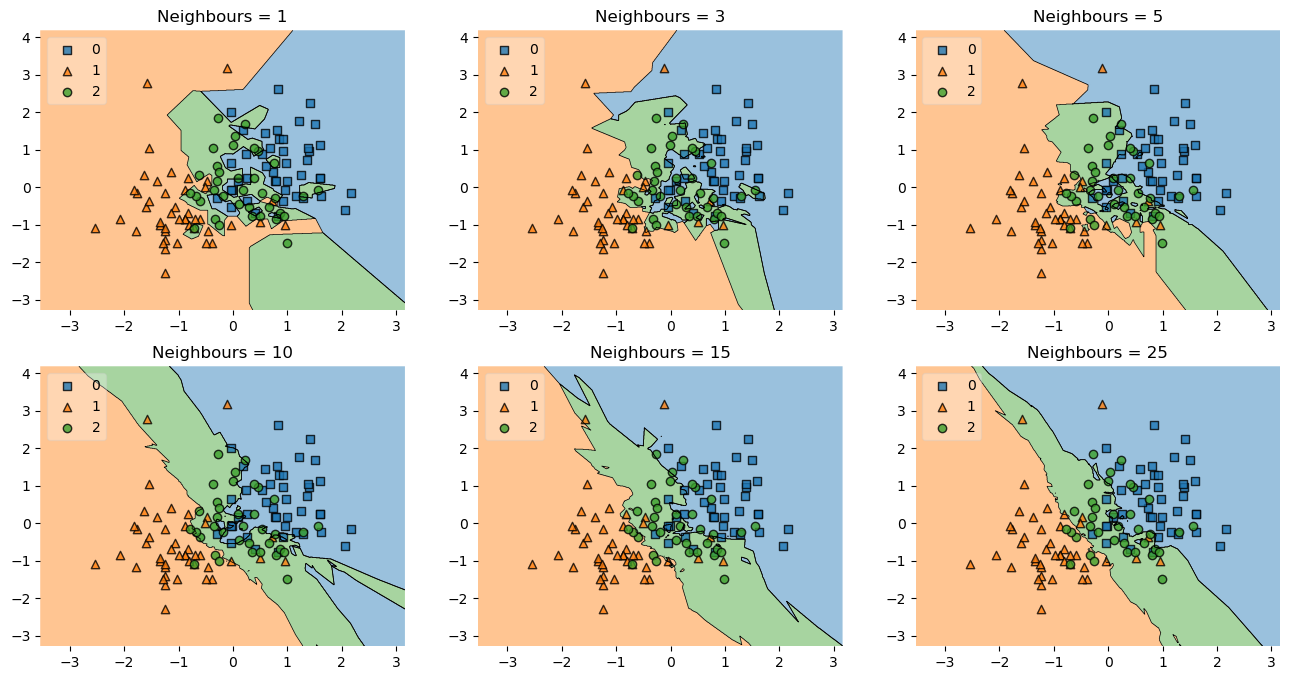

In [11]:
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(16, 8))

labels = ['Neighbours = ' + str(neighbour) for neighbour in k_neighbours]
for clf, lab, grd in zip(models,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

* Из полученных данных в задании 1.3 можно сказать, что наилучшее число соседей равно 5. <br> <br>
* Но судя по графику из задания 1.5 хочется сказать, что наиболее подходящее число соседей в районе 15-25. Если брать слишком мало соседей, то мы скатываемся в частные случаи и видно переобучение. При 10 соседях класс 0 сильно проталкивается в класс 2, что выглядит немного странно. Да и зелёный выброс в правый нижний угол тоже довольно странный. А вот при 15 или 25 соседях картина выглядит наиболее привлекательно: видно, что класс 2 должен находится между классами 1 и 0 (выглядит как некий переходный класс). Каких-то впадин одного класса в другой нет, переобучение не наблюдается. <br>
#### Вывод:
* С точки зрения точности по числам выгодно взять 5 соседей, но с визуальной я бы выбрал 25.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

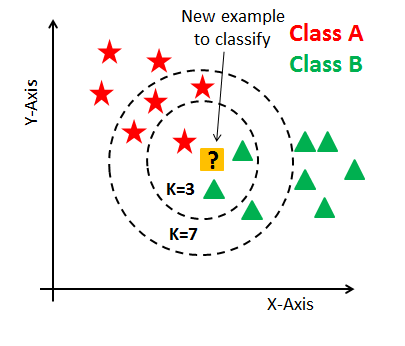

In [12]:
import numpy as np
from collections import Counter

In [13]:
class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X: np.array, y: np.array) -> None:
        self.X_train = X
        self.y_train = y

    def distance(self, x_test: np.array, x_train: np.array) -> float:
        return np.sqrt(np.sum(np.square(x_test - x_train)))

    def find_k_neighbors(self, x_test: np.array) -> np.array:
        distances = np.zeros(len(self.X_train))

        for i in range(len(self.X_train)):
            distances[i] = self.distance(x_test, self.X_train[i])

        y_train_sorted = self.y_train[distances.argsort()]
        return y_train_sorted[:self.k]

    def predict(self, X: np.array) -> np.array:
        self.X_test = X
        y_pred = np.zeros(len(self.X_test), dtype=np.int64)
        for i in range(len(self.X_test)):
            x_cur = self.X_test[i]
            neighbors = self.find_k_neighbors(x_cur)
            y_pred[i] = Counter(neighbors).most_common(1)[0][0]
        return y_pred

In [14]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [15]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [16]:
data = pd.read_csv('data/diamonds.csv')
display(data)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [17]:
if data.isna().sum().sum() == 0:
    print('Пропущенных значений нет')
else:
    print('Пропущенные значения есть')


Пропущенных значений нет


In [18]:
display(data.describe())

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [19]:
### Как мы можем заметить, у некоторых драгоценных камней одна из осей равна нулю, что немного бессмысленно.
### Избавимся от таких значений:
data = data.drop((data[(data['x'] == 0) | (data['y'] == 0) | (data['z'] == 0)].index))
display(data.describe())


,Unnamed: 0,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,26972.355731,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,15571.269010,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13487.750000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.250000,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

* Да, есть бессмысленный столбец "Unnamed: 0". Удалим его:

In [20]:
data.drop(columns='Unnamed: 0', inplace=True)
display(data)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [21]:
display(data.dtypes)

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

Как мы видим, нам нужны все признаки, кроме cut, color и clarity

In [22]:
corr_price = data.drop(columns=['cut', 'color', 'clarity']).corr()['price']
display(corr_price)

carat    0.921592
depth   -0.010729
table    0.127245
price    1.000000
x        0.887231
y        0.867864
z        0.868206
Name: price, dtype: float64

#### Вывод:
* С целевой переменной больше всего коррелируют карат драгоценного камня и его размеры.

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [23]:
data = pd.get_dummies(data, drop_first=True)
display(data)

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns='price'), data['price'], test_size=0.3, random_state=10)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [25]:
sc_columns = X_train.columns[X_train.dtypes == 'float64']
X_train[sc_columns] = sc.fit_transform(X_train[sc_columns])
X_test[sc_columns] = sc.transform(X_test[sc_columns])

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [27]:
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

print('Standard linear regression:')
print('MSE on train:', mean_squared_error(y_pred=l_reg.predict(X_train), y_true=y_train))
print('MSE on test:', mean_squared_error(y_pred=l_reg.predict(X_test), y_true=y_test))

Standard linear regression:
MSE on train: 1266104.6473758267
MSE on test: 1882262.4451905757


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [28]:
temporary_weights = pd.DataFrame(columns=['Feature', 'Coef'])
temporary_weights['Feature'] = l_reg.feature_names_in_
temporary_weights['Coef'] = l_reg.coef_
display(temporary_weights)

,Feature,Coef
0,carat,5439.463465
1,depth,57.388528
2,table,-52.812225
3,x,-1807.325511
4,y,1773.103752
5,z,-1257.126996
6,cut_Good,466.356820
7,cut_Ideal,728.572588
8,cut_Premium,699.505749
9,cut_Very Good,602.000820


Большие по модулю веса имеют: карат, размерности, чистота и "плохие" цвета.

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [29]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [30]:
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)

print('Lasso')

print('MSE on train:', mean_squared_error(y_pred=lasso.predict(X_train), y_true=y_train))
print('MSE on test:', mean_squared_error(y_pred=lasso.predict(X_test), y_true=y_test))

Lasso
MSE on train: 1497994.2992622736
MSE on test: 1553280.241480401


In [31]:
temporary_weights_lasso = pd.DataFrame(columns=['Feature', 'Coef'])
temporary_weights_lasso['Feature'] = lasso.feature_names_in_
temporary_weights_lasso['Coef'] = lasso.coef_
display(temporary_weights_lasso)

,Feature,Coef
0,carat,4830.490042
1,depth,-88.483947
2,table,-100.316519
3,x,-239.447612
4,y,-0.000000
5,z,-559.396557
6,cut_Good,-0.000000
7,cut_Ideal,152.706206
8,cut_Premium,51.583662
9,cut_Very Good,76.267387


In [32]:
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

print('Ridge:')
print('MSE on train:', mean_squared_error(y_pred=ridge.predict(X_train), y_true=y_train))
print('MSE on test:', mean_squared_error(y_pred=ridge.predict(X_test), y_true=y_test))


Ridge:
MSE on train: 1270360.641318766
MSE on test: 1717200.058059671


In [33]:
temporary_weights_ridge = pd.DataFrame(columns=['Feature', 'Coef'])
temporary_weights_ridge['Feature'] = ridge.feature_names_in_
temporary_weights_ridge['Coef'] = ridge.coef_
display(temporary_weights_ridge)

,Feature,Coef
0,carat,5379.334701
1,depth,41.587225
2,table,-55.876420
3,x,-1558.788295
4,y,1474.889524
5,z,-1158.350397
6,cut_Good,505.426765
7,cut_Ideal,769.724024
8,cut_Premium,728.386961
9,cut_Very Good,649.922092


#### Выводы:
* Веса в Ridge регрессии сильно не изменились, а в Lasso значительно (некоторые вообще занулились). <br> <br>
* Если судить по Lasso-регресси, то небольшая проблема мультиколлинеарности существует (некоторые веса занулились), и в целом веса многих признаков уменьшились, что так же свидетельствует о корректировки чувствительности модели к некоторым признакам (в большинстве своём как раз к карату, размерам, чистоте и разрезам)

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

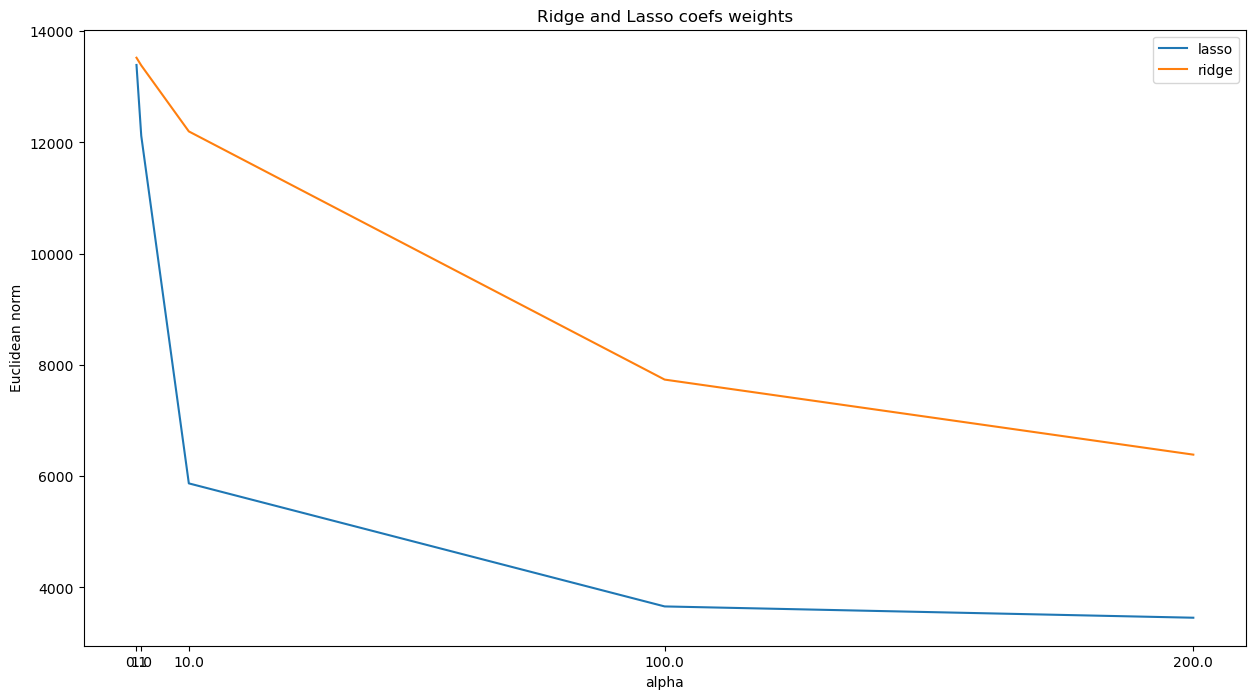

In [34]:
alphas = [0.1, 1, 10, 100, 200]
lasso_weights = []
ridge_weights = []
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha, max_iter=1000000)
    ridge_model = Ridge(alpha=alpha, max_iter=1000000)
    lasso_model.fit(X_train, y_train)
    ridge_model.fit(X_train, y_train)
    lasso_weights.append(np.linalg.norm(lasso_model.coef_))
    ridge_weights.append(np.linalg.norm(ridge_model.coef_))

plt.subplots(figsize=(15,8))
plt.title('Ridge and Lasso coefs weights')
plt.plot(alphas, lasso_weights, label='lasso')
plt.plot(alphas, ridge_weights, label='ridge')
plt.xticks(alphas)
plt.xlabel('alpha')
plt.ylabel('Euclidean norm')
plt.legend()
plt.show()

#### Вывод:
* Lasso-регрессия гораздо агрессивнее снижает веса. <br> <br>
* Мне кажется, что Lasso-регрессию часто используют для отбора признаков, потому что она сильнее корректирует веса и зануляет некоторые признаки, от которых можно избавиться.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [35]:
from sklearn.linear_model import LassoCV

In [36]:
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=1000000)
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=[0.1, 1, 10, 100, 200], cv=5, max_iter=1000000)

In [37]:
mse_alphas = pd.DataFrame(columns=['alpha', 'mse'])
mse_alphas['alpha'] = lasso_cv.alphas_
for i in range(len(alphas)):
    mse_alphas.loc[i, 'mse'] = lasso_cv.mse_path_[i, :].mean()
display(mse_alphas)

,alpha,mse
0,200.0,2433983.297631
1,100.0,2221781.746137
2,10.0,1502415.35574
3,1.0,1278082.306233
4,0.1,1273076.82693


Как мы можем увидеть, наименьший средний mse у alpha = 0.1, оно нам и подходит

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [38]:
final_lasso = Lasso(alpha=0.1, max_iter=1000000)
final_lasso.fit(X_train, y_train)
weights_lasso = pd.DataFrame(columns=['Feature', 'Coef'])
weights_lasso['Feature'] = lasso.feature_names_in_
weights_lasso['Coef'] = lasso.coef_
display(temporary_weights_lasso)

,Feature,Coef
0,carat,4830.490042
1,depth,-88.483947
2,table,-100.316519
3,x,-239.447612
4,y,-0.000000
5,z,-559.396557
6,cut_Good,-0.000000
7,cut_Ideal,152.706206
8,cut_Premium,51.583662
9,cut_Very Good,76.267387


#### Выводы:
Очевидно, что вес камня больше всего влияет на цену, ну и цвет тоже (всякие рубины и изумруды для людей выглядят более привлекательно, чем стандартные драгоценные камни). Чистота, думаю, скорее сильно важна именно для ювелиров, а не для обычных людей (из далека, как мне кажется, не заметишь, насколько чистый камешек). Не очень понятно, почему оси x и z камня имеют отрицательный вес, возможно модель пытается этими признаками компенсировать огромный вес у признака карат.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [39]:
print('Standard linear regression:')
print('MSE on test:', mean_squared_error(y_pred=l_reg.predict(X_test), y_true=y_test))
print('\n\n')

print('Final lasso:')
print('MSE on test:', mean_squared_error(y_pred=final_lasso.predict(X_test), y_true=y_test))

Standard linear regression:
MSE on test: 1882262.4451905757



Final lasso:
MSE on test: 1828168.9688238555


#### Выводы:
* Немного лучший результат у Lasso-регрессии. <br> <br>
* Прирост в точности совсем незначительный, либо нам не хватает признаков для более точного результата, либо сама модель не очень подходит для данной задачи. <br> <br>
* В целом, я бы использовал Lasso-регрессию в любом случае. Она должна бороться с переобучнием, с помощью неё возможно отбирать признаки. Но в текущем проекте этого явно сказать нельзя. Возможно я выбрал плохой random state для выборки (например, на 560 у меня MSE Train хуже, чем MSE Test :D)